In [93]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [145]:
get_data = lambda path:  pd.read_excel(path,engine="openpyxl", usecols="B:H")

raw_data = {
    "AIFeynman":{
       "0.0":get_data("../logs/AIF_noise-0.0_2022-07-15_17-16-16.xlsx"),
        "0.1":get_data("../logs/AIF_noise-0.1_2022-07-15_19-19-51.xlsx"),
        "0.01":get_data("../logs/AIF_noise-0.01_2022-07-15_18-19-54.xlsx"),
        "0.001":get_data("../logs/AIF_noise-0.001_2022-07-15_18-36-59.xlsx"),
    },
    "Gplearn":{
       "0.0":get_data("../logs/gplearn_noise-0.0_2022-07-15_19-07-43.xlsx"),
        "0.1":get_data("../logs/gplearn_noise-0.1_2022-07-15_19-39-30.xlsx"),
        "0.01":get_data("../logs/gplearn_noise-0.01_2022-07-15_19-34-49.xlsx"),
        "0.001":get_data("../logs/gplearn_noise-0.001_2022-07-15_19-23-13.xlsx"),
    },
    "Deep symbolic regression":{
       "0.0":get_data("../logs/dsr_noise-0.0_2022-07-15_20-03-21.xlsx"),
        "0.1":get_data("../logs/dsr_noise-0.1_2022-07-15_20-28-52.xlsx"),
        "0.01":get_data("../logs/dsr_noise-0.01_2022-07-15_20-27-07.xlsx"),
        "0.001":get_data("../logs/dsr_noise-0.001_2022-07-15_20-08-00.xlsx"),
    },
    "NeSymRes":{
        "0.0":get_data("../logs/NeSymRes_noise-0.0_2022-07-16_16-34-00.xlsx"),
        "0.1":get_data("../logs/NeSymRes_noise-0.1_2022-07-16_17-34-40.xlsx"),
        "0.01":get_data("../logs/NeSymRes_noise-0.01_2022-07-16_17-23-34.xlsx"),
        "0.001":get_data("../logs/NeSymRes_noise-0.001_2022-07-16_17-21-23.xlsx"),
    }
}

In [146]:
noises = ["0.0", "0.001", "0.01", "0.1"]
models = ["AIFeynman", "Gplearn", "Deep symbolic regression", "NeSymRes"]
acc, tim = [], []

df_dict = {
    "model":[],
    "accuracy":[],
    "noise":[],
    "duration":[]
}

for noise in noises:
    
    for model in models:        
        df_col = raw_data[model][noise]
        
        acc = len(df_col[df_col["accuracy"]>=0.95])/len(df_col)        
        dur = raw_data[model][noise].describe()['time']['mean']
        
        df_dict["model"].append(model)
        df_dict["accuracy"].append(acc)
        df_dict["noise"].append(noise)
        df_dict["duration"].append(dur)
        
df = pd.DataFrame(data=df_dict)
df.head()

,model,accuracy,noise,duration
0,AIFeynman,0.769231,0.0,64.797466
1,Gplearn,0.500000,0.0,19.480521
2,Deep symbolic regression,0.615385,0.0,19.747482
3,NeSymRes,0.557692,0.0,23.728346
4,AIFeynman,0.730769,0.001,67.310117


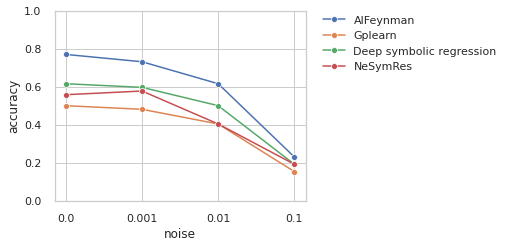

In [147]:
rcParams['figure.figsize'] = 4.5,3.5

fig = sns.lineplot(
    hue="model", x="noise", y="accuracy", 
    marker="o",
    markers=True, dashes=False,
    data=df)

fig.set_ylim(0, 1.0)
plt.legend(["AIFeynman", "Gplearn", "Deep symbolic regression", "NeSymRes"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

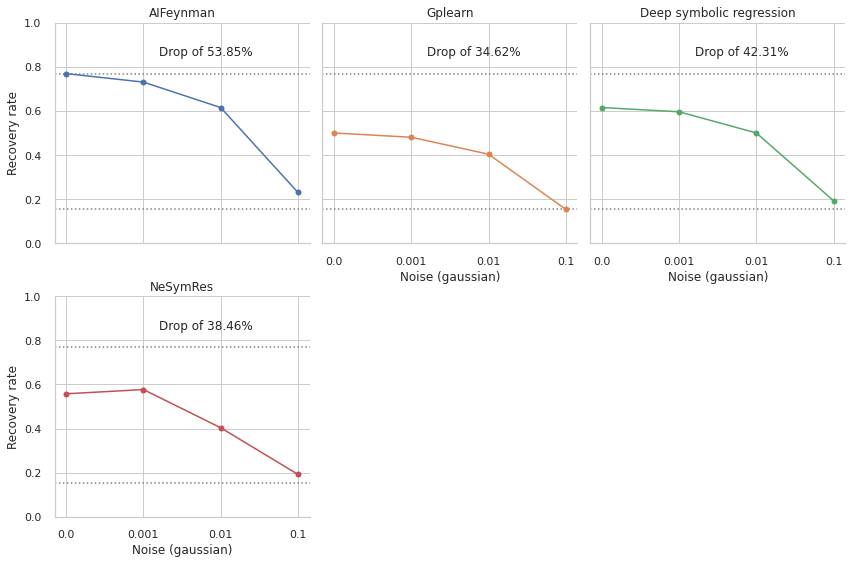

In [148]:
sns.set_theme(style="ticks")
sns.set_style('whitegrid')

grid = sns.FacetGrid(df, col="model", hue="model",
                     col_wrap=3, height=4)

grid.refline(y=df['accuracy'].max(), linestyle=":")
grid.refline(y=df['accuracy'].min(), linestyle=":")

grid.map(plt.plot, "noise", "accuracy", marker="o")

grid.set_axis_labels("Noise (gaussian)", "Recovery rate")

grid.set(ylim=(0.0, 1.0))

for ax, title in zip(grid.axes.flat, ["AIFeynman", "Gplearn", "Deep symbolic regression", "NeSymRes"]):
    ax.set_title(title)
    
    local_df = df[df["model"]==title]
    acc_change = local_df["accuracy"].max() - local_df["accuracy"].min()
    ax.text(1.2, 0.85,f'Drop of {acc_change*100:.2f}%', fontsize=12)


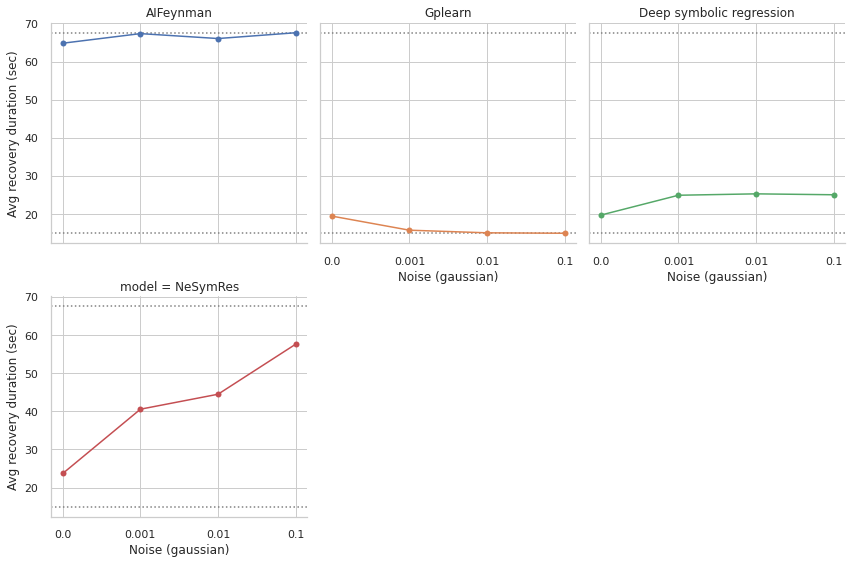

In [149]:
sns.set_theme(style="ticks")
sns.set_style('whitegrid')

grid = sns.FacetGrid(df, col="model", hue="model",
                     col_wrap=3, height=4)

grid.refline(y=df['duration'].max(), linestyle=":")
grid.refline(y=df['duration'].min(), linestyle=":")

grid.map(plt.plot, "noise", "duration", marker="o")

grid.set_axis_labels("Noise (gaussian)", "Avg recovery duration (sec)")

# grid.set(ylim=(0.0, 1.0))

for ax, title in zip(grid.axes.flat, ["AIFeynman", "Gplearn", "Deep symbolic regression"]):
    ax.set_title(title)
    
    local_df = df[df["model"]==title]
    acc_change = local_df["duration"].max() - local_df["duration"].min()
#     ax.text(1.2, 10.85,f'{acc_change*100:.2f}%', fontsize=12)


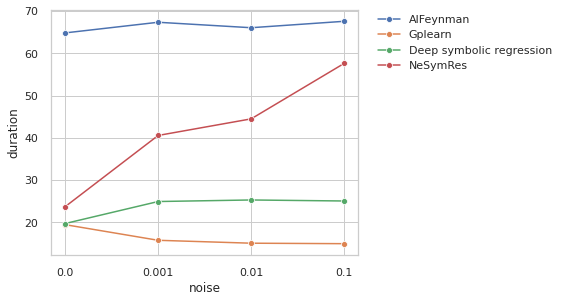

In [150]:
rcParams['figure.figsize'] = 5.5,4.5

fig = sns.lineplot(
    hue="model", x="noise", y="duration", 
    marker="o",
    markers=True, dashes=False,
    data=df, legend=False)

plt.legend(["AIFeynman", "Gplearn", "Deep symbolic regression", "NeSymRes"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# fig.legend()